In [1]:
import matplotlib.pyplot as plt
import numpy as np
# from scipy.interpolate import UnivariateSpline
from ast import literal_eval


In [2]:
import tensorflow as tf
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

path_ = r'G:\Other computers\My PC\NUS MComp\CS5446\Project\Code\CS5446-Bipedal-Walker\ppo-expts'

# read from summary writer
event_acc = EventAccumulator(path_+"\\ppo-adameps-1e-5\\runs\\Nov13_05-00-28_DESKTOP-OC1G841_BipedalWalker-v3_Adam_0.00025\\events.out.tfevents.1699822828.DESKTOP-OC1G841")
event_acc.Reload()
event_acc.Tags()

{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': ['Workers_12/score_per_episode',
  'Workers_12/learning_rate',
  'Workers_12/average_score',
  'Data/actor_loss_per_replay',
  'Data/critic_loss_per_replay',
  'Data/approx_kl_per_replay',
  'Data/approx_ent_per_replay'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [ ]:
n = len(event_acc.Scalars('Workers_12/average_score'))

In [11]:
score = []
for i in range(n):
    score.append(event_acc.Scalars('Workers_12/average_score')[i].value)


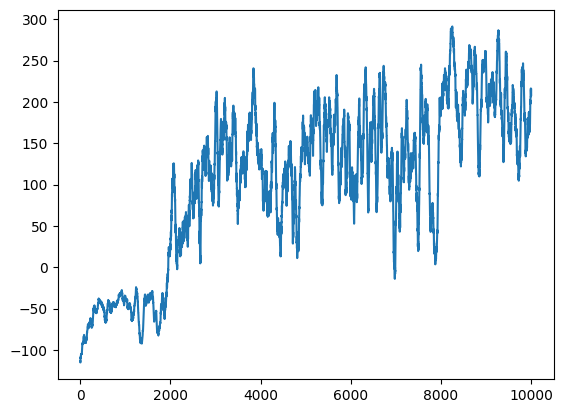

In [12]:
plt.plot([i for i in range(n)], score)

In [13]:
def get_scores(sub_path):
    path_ = r'G:\Other computers\My PC\NUS MComp\CS5446\Project\Code\CS5446-Bipedal-Walker\ppo-expts'

    # read from summary writer
    event_acc = EventAccumulator(path_+sub_path)
    event_acc.Reload()
    event_acc.Tags()
    n = len(event_acc.Scalars('Workers_12/average_score'))

    score = []
    for i in range(n):
        score.append(event_acc.Scalars('Workers_12/average_score')[i].value)
    return score

In [14]:
adam_eps_1_5 = get_scores("\\ppo-adameps-1e-5\\runs\\Nov13_05-00-28_DESKTOP-OC1G841_BipedalWalker-v3_Adam_0.00025\\events.out.tfevents.1699822828.DESKTOP-OC1G841")

In [15]:
base = get_scores(r"\ppo-base\runs\Nov13_05-00-25_DESKTOP-OC1G841_BipedalWalker-v3_Adam_0.00025\events.out.tfevents.1699822825.DESKTOP-OC1G841")

In [16]:
clipnorm_05 = get_scores(r"\ppo-clipnorm0.5\runs\Nov13_09-40-59_DESKTOP-OC1G841_BipedalWalker-v3_Adam_0.00025\events.out.tfevents.1699839659.DESKTOP-OC1G841")

In [17]:
lambda_0 = get_scores(r"\ppo-lambda-0\runs\Nov13_05-00-32_DESKTOP-OC1G841_BipedalWalker-v3_Adam_0.00025\events.out.tfevents.1699822832.DESKTOP-OC1G841")

In [18]:
lambda_02 = get_scores(r"\ppo-lambda-02\runs\Nov21_00-50-52_DESKTOP-OC1G841_BipedalWalker-v3_Adam_0.00025\events.out.tfevents.1700499052.DESKTOP-OC1G841")

In [19]:
lambda_05 = get_scores(r"\ppo-lambda-05\runs\Nov21_00-45-48_DESKTOP-OC1G841_BipedalWalker-v3_Adam_0.00025")

In [20]:
lr_1e4 = get_scores(r"\ppo-lr-1e-4\runs\Nov13_05-00-35_DESKTOP-OC1G841_BipedalWalker-v3_Adam_0.0001\events.out.tfevents.1699822835.DESKTOP-OC1G841")

In [21]:
lr_5e4 = get_scores(r"\ppo-lr-5e-4\runs\Nov13_09-07-22_DESKTOP-OC1G841_BipedalWalker-v3_Adam_0.0005\events.out.tfevents.1699837642.DESKTOP-OC1G841")

In [22]:
nn64 = get_scores(r"\ppo-nn-64-64\runs\Nov13_09-07-22_DESKTOP-OC1G841_BipedalWalker-v3_Adam_0.00025\events.out.tfevents.1699837642.DESKTOP-OC1G841")

In [25]:
reward_clip = get_scores(r"\ppo-reward-clip\runs\Nov21_23-00-05_DESKTOP-OC1G841_BipedalWalker-v3_Adam_0.00025\events.out.tfevents.1700578805.DESKTOP-OC1G841")

In [36]:
ortho = get_scores(r"\ppo-ortho\runs\Nov21_23-41-31_DESKTOP-OC1G841_BipedalWalker-v3_Adam_0.00025\events.out.tfevents.1700581291.DESKTOP-OC1G841")

In [41]:
def exponential_smoothing(data, alpha=0.1):
    """Compute exponential smoothing."""
    smoothed = [data[0]]  # Initialize with the first data point
    for i in range(1, len(data)):
        st = alpha * data[i] + (1 - alpha) * smoothed[-1]
        smoothed.append(st)
    return smoothed

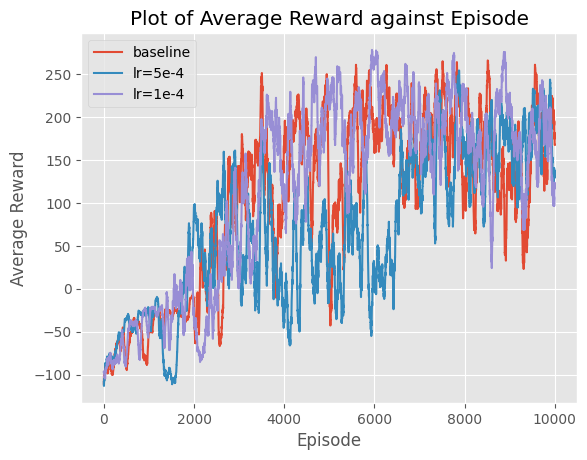

<Figure size 2000x2000 with 0 Axes>

In [47]:
plt.style.use('ggplot')
plt.plot([i for i in range(n)], base, label='baseline')
# plt.plot([i for i in range(n)], clipnorm_05, label='clipnorm=0.5')
# plt.plot([i for i in range(n)], lambda_0, label='lambda=0')
# plt.plot([i for i in range(n)], lambda_02, label='lambda=02')
# plt.plot([i for i in range(n)], lambda_05, label='lambda=05')
# plt.plot([i for i in range(n)], reward_clip, label='reward_clip')
# plt.plot([i for i in range(n)], ortho, label='ortho')
# plt.plot([i for i in range(n)], nn64, label='FC-64-64')
plt.plot([i for i in range(n)], lr_5e4, label='lr=5e-4')
plt.plot([i for i in range(n)], lr_1e4, label='lr=1e-4')
plt.title("Plot of Average Reward against Episode")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.legend()
plt.figure(figsize=(20,20))
plt.show()

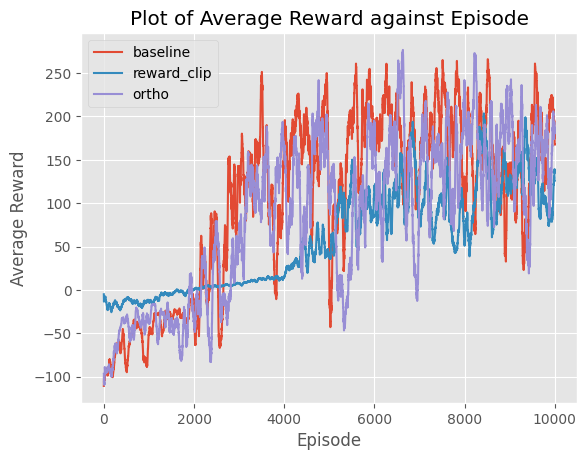

<Figure size 2000x2000 with 0 Axes>

In [49]:
plt.style.use('ggplot')
plt.plot([i for i in range(n)], base, label='baseline')
# plt.plot([i for i in range(n)], clipnorm_05, label='clipnorm=0.5')
# plt.plot([i for i in range(n)], lambda_0, label='lambda=0')
# plt.plot([i for i in range(n)], lambda_02, label='lambda=02')
# plt.plot([i for i in range(n)], lambda_05, label='lambda=05')
plt.plot([i for i in range(n)], reward_clip, label='reward_clip')
plt.plot([i for i in range(n)], ortho, label='ortho')
# plt.plot([i for i in range(n)], nn64, label='FC-64-64')
# plt.plot([i for i in range(n)], lr_5e4, label='lr=5e-4')
# plt.plot([i for i in range(n)], lr_1e4, label='lr=1e-4')
plt.title("Plot of Average Reward against Episode")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.legend()
plt.figure(figsize=(20,20))
plt.show()

### Compute average results

In [3]:
def get_run_stats(path_):
    with open(path_,'r') as f:
        arr = f.read()
        arr = np.array(literal_eval(arr))
        mean = arr.mean()
        std = arr.std()
    return mean, std
    

In [ ]:
mean_adam, std_adam = get_run_stats(r'G:\Other computers\My PC\NUS MComp\CS5446\Project\Code\CS5446-Bipedal-Walker\ppo-expts\ppo-adameps-1e-5\test_scores.txt')
mean_adam, std_adam

(318.2858623085359, 0.43921341941731473)

In [ ]:
mean_base, std_base = get_run_stats(r'G:\Other computers\My PC\NUS MComp\CS5446\Project\Code\CS5446-Bipedal-Walker\ppo-expts\ppo-base\test_scores.txt')
mean_base, std_base

(300.3608215831163, 8.68459239566265)

In [ ]:
mean_cn, std_cn = get_run_stats(r'G:\Other computers\My PC\NUS MComp\CS5446\Project\Code\CS5446-Bipedal-Walker\ppo-expts\ppo-clipnorm0.5\test_scores.txt')
mean_cn, std_cn

(292.03766340832846, 13.285157011458077)

In [ ]:
mean_l0, std_l0 = get_run_stats(r'G:\Other computers\My PC\NUS MComp\CS5446\Project\Code\CS5446-Bipedal-Walker\ppo-expts\ppo-lambda-0\test_scores.txt')
mean_l0, std_l0

(308.10796834575694, 16.224360215153652)

In [ ]:
mean_l02, std_l02 = get_run_stats(r'G:\Other computers\My PC\NUS MComp\CS5446\Project\Code\CS5446-Bipedal-Walker\ppo-expts\ppo-lambda-02\test_scores.txt')
mean_l02, std_l02

(321.39159520306504, 0.0739189704337004)

In [ ]:
mean_l05, std_l05 = get_run_stats(r'G:\Other computers\My PC\NUS MComp\CS5446\Project\Code\CS5446-Bipedal-Walker\ppo-expts\ppo-lambda-05\test_scores.txt')
mean_l05, std_l05

(304.7953280107711, 12.756154364575405)

In [ ]:
mean_lowlr, std_lowlr = get_run_stats(r'G:\Other computers\My PC\NUS MComp\CS5446\Project\Code\CS5446-Bipedal-Walker\ppo-expts\ppo-lr-1e-4\test_scores.txt')
mean_lowlr, std_lowlr

(302.5322424038883, 9.594782852978478)

In [ ]:
mean_highlr, std_highlr = get_run_stats(r'G:\Other computers\My PC\NUS MComp\CS5446\Project\Code\CS5446-Bipedal-Walker\ppo-expts\ppo-lr-5e-4\test_scores.txt')
mean_highlr, std_highlr 

(265.9594897068267, 48.17237410404209)

In [ ]:
mean_nn64, std_nn64 = get_run_stats(r'G:\Other computers\My PC\NUS MComp\CS5446\Project\Code\CS5446-Bipedal-Walker\ppo-expts\ppo-nn-64-64\test_scores.txt')
mean_nn64, std_nn64 

(282.8739871237888, 12.776838976694117)

In [ ]:
mean_reward_clip, std_reward_clip = get_run_stats(r'G:\Other computers\My PC\NUS MComp\CS5446\Project\Code\CS5446-Bipedal-Walker\ppo-expts\ppo-reward-clip\test_scores.txt')
mean_reward_clip, std_reward_clip 

(237.47963241403596, 30.22131474157172)

In [51]:
mean_ortho, std_ortho = get_run_stats(r'G:\Other computers\My PC\NUS MComp\CS5446\Project\Code\CS5446-Bipedal-Walker\ppo-expts\ppo-ortho\test_scores.txt')
mean_ortho, std_ortho 

(202.50611321793698, 34.145004580153916)

In [52]:
mean_base_hc, std_base_hc = get_run_stats(r'G:\Other computers\My PC\NUS MComp\CS5446\Project\Code\CS5446-Bipedal-Walker\ppo-expts\ppo-base-hardcore\test_scores.txt')
mean_base_hc, std_base_hc 

(-0.6682729182921558, 1.0695489588239036)

In [4]:
mean_base_hc_no_idle, std_base_hc_no_idle = get_run_stats(r'G:\Other computers\My PC\NUS MComp\CS5446\Project\Code\CS5446-Bipedal-Walker\ppo-expts\ppo-base-hardcore-no-idle\test_scores.txt')
mean_base_hc_no_idle, std_base_hc_no_idle 

(-100.4701526696232, 0.07439481879595725)